<a href="https://colab.research.google.com/github/nicc0614/2025.02.18/blob/main/EX04_05_%E8%BE%A8%E8%AD%98%E9%B3%B6%E5%B0%BE%E8%8A%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 問題定義
以 K 近鄰演算法辨識鳶尾花，進行參數調校。

鳶尾花資料集最初是埃德加·安德森從加拿大加斯帕半島的鳶尾屬花朵中提取的形態學變異資料，後由羅納德·費雪作為判別分析的一個例子，運用到統計學中。

其資料集包含了150個樣本，都屬於鳶尾屬下的3個亞屬，分別是山鳶尾（Setosa）、變色鳶尾（Versicolor）和維吉尼亞鳶尾（Virginica）。每個樣本都包含4項特徵，即花萼和花瓣的長度和寬度，它們可用於樣本的定量分析。基於這些特徵，費雪發展了能夠確定其屬種的線性判別分析。

## 資料收集

In [1]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

X, y = iris.data, iris.target
df = iris.frame

In [2]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 資料前處理

### 資料清理

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### 探索性分析

In [4]:
df.cor=df.corr()
df.cor

<ipython-input-4-f8ecd6791f12>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cor=df.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


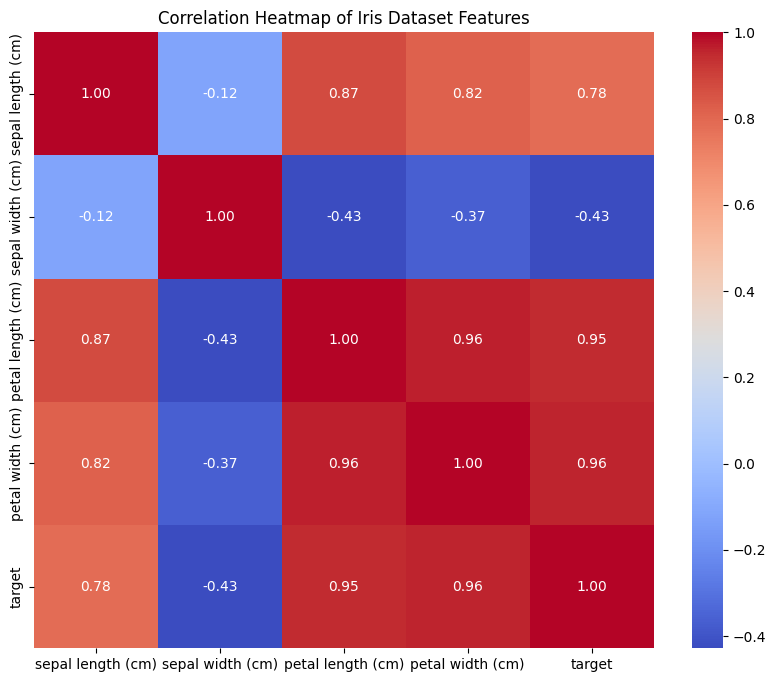

In [5]:
# prompt: 用seaborn顯示df_cor的相關熱圖

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Iris Dataset Features')
plt.show()


### 資料分割

In [16]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 類別轉換

### 特徵縮放

In [17]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 模型訓練

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
knn.score(X_train, y_train)


0.9583333333333334

## 模型評估

In [20]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn.predict(X_test)

print("準確率：", accuracy_score(y_test, y_pred))
print("分類報告：\n", classification_report(y_test, y_pred))


準確率： 1.0
分類報告：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 模型調整

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'n_neighbors': [3,5,7], 'weights': ["uniform", "distance"]}
grid = GridSearchCV(knn , param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [22]:
grid.best_params_    # 最佳參數組合

{'n_neighbors': 3, 'weights': 'uniform'}

In [23]:
grid.best_score_     # 交叉驗證中最佳準確率

np.float64(0.95)

## 模型部署

### 儲存模型

In [24]:
# prompt: 幫我儲存knn和scaler

import joblib

# 儲存 knn 模型
joblib.dump(knn, 'knn_model.pkl')

# 儲存 scaler
joblib.dump(scaler, 'knn_scaler.pkl')


['knn_scaler.pkl']

In [25]:
# prompt: 載入knn和scaler

# 載入 knn 模型和 scaler
loaded_knn = joblib.load('knn_model.pkl')
loaded_scaler = joblib.load('knn_scaler.pkl')

In [31]:

import pandas as pd
data = {
     'sepal length (cm)': [5.1],
     'sepal width (cm)': [3.5],
     'petal length (cm)': [1.4],
     'petal width (cm)': [0.2]
 }
virtual_df = pd.DataFrame(data, columns=data.keys())

# 對虛擬資料進行預測
virtual_df_scaled = loaded_scaler.transform(virtual_df)
virtual_prediction = loaded_knn.predict(virtual_df_scaled)

# 顯示預測結果
predicted_class = iris.target_names[virtual_prediction[0]]
print(f"預測的花種：{predicted_class}")

預測的花種：setosa


### 推論預測